## n-grams

this script explores the possibility of n-grams on the final data

In [1]:
# imports
import pandas as pd
import re
import unicodedata
import nltk
import json
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
# read data
path = '../data/database/.temp/all.csv'
df = pd.read_csv(path, sep=';')

In [3]:
#nltk.download()

In [4]:
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

def basic_clean(text):
    """
    A simple function to clean up the data. All the words that
    are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
#df_selection = df[df['kind']=='Article']
#words = basic_clean(''.join(str(df_selection['description'].tolist())))

words = basic_clean(''.join(str(df['description'].tolist())))

In [6]:
words[0:20]

['public',
 'material',
 'fall',
 '2016',
 'offering',
 'cs145',
 'nan',
 'nan',
 'jupyter',
 'adaptation',
 'learn',
 'haskell',
 'great',
 'good',
 'notebook',
 'deep',
 'learning',
 'tensorflow',
 '2',
 'kera']

{
   "data": 2879,
   "model": 2095,
   "image": 1677,
   "kernel": 1485,
   "competition": 1321,
   "notebook": 1299,
   "learning": 1202,
   "using": 1150,
   "feature": 1111,
   "dataset": 971
}


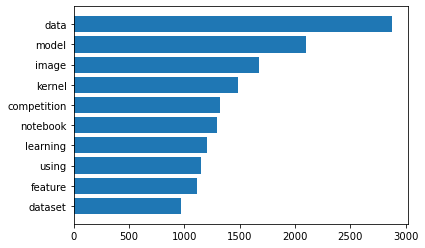

In [7]:
onegrams = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:10]
onegrams = onegrams.to_dict()
onegrams = {' '.join(x): y for x,y in onegrams.items()}
print(json.dumps(onegrams, indent=3))

D = onegrams
plt.barh(*zip(*D.items()))
plt.gca().invert_yaxis()
plt.show()

plt.show()

{
   "machine learning": 716,
   "data science": 205,
   "jupyter notebook": 193,
   "deep learning": 172,
   "neural network": 151,
   "test set": 146,
   "feature engineering": 128,
   "training data": 128,
   "learning model": 118,
   "data analysis": 111
}


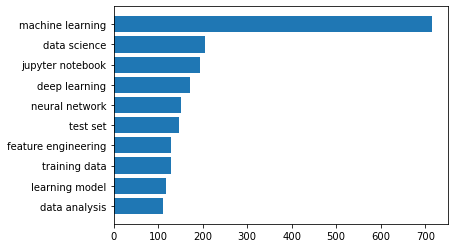

In [8]:
twograms = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
twograms = twograms.to_dict()
twograms = {' '.join(x): y for x,y in twograms.items()}
print(json.dumps(twograms, indent=3))

D = twograms
plt.barh(*zip(*D.items()))
plt.gca().invert_yaxis()
plt.show()

plt.show()

{
   "machine learning model": 96,
   "machine learning algorithm": 55,
   "exploratory data analysis": 53,
   "convolutional neural network": 45,
   "xa0 xa0xa0 xa0": 38,
   "city los angeles": 29,
   "using machine learning": 29,
   "natural language processing": 28,
   "machine learning project": 28,
   "read machine learning": 23
}


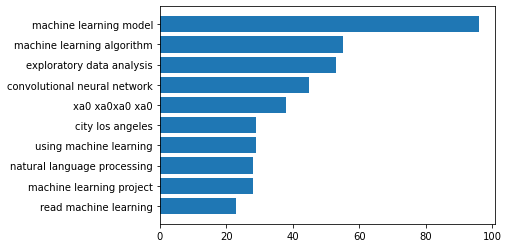

In [9]:
threegrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
threegrams = threegrams.to_dict()
threegrams = {' '.join(x): y for x,y in threegrams.items()}
print(json.dumps(threegrams, indent=3))

D = threegrams
plt.barh(*zip(*D.items()))
plt.gca().invert_yaxis()
plt.show()

plt.show()